In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read the data type
dtypes = pd.read_csv('train_m.csv', nrows=1).iloc[0].to_dict()
# since the 1st row is datatypes, skip it
dataset = pd.read_csv('train_m.csv', dtype=dtypes, skiprows=[1])

In [3]:
dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0    NaN   NaN         NaN       0      2   
1    AllPub       FR2  ...        0    NaN   NaN         NaN       0      5   
2    AllPub    Inside  ...        0    NaN   NaN         NaN       0      9   
3    AllPub    Corner  ...        0    NaN   NaN         NaN       0      2   
4    AllPub       FR2  ...        0    NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  
0   2008       WD         Normal     208500  
1   2007       WD         Normal     181500  
2   2008       WD         Normal     223500  
3   2006       WD        Abnorml     140000  
4   2008       WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
dataset.dtypes

MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 80, dtype: object

In [4]:
# 3 kinds of graphs used
# scatter graph to show the trends and distribution of the numerical data
# histogram to show the distribution of the categorical data
# bar chart to show the trend of the categorical data

# separate the features
cat_features = dataset.columns[dataset.dtypes=='category']
num_features = dataset.columns[~dataset.columns.isin(cat_features)]

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

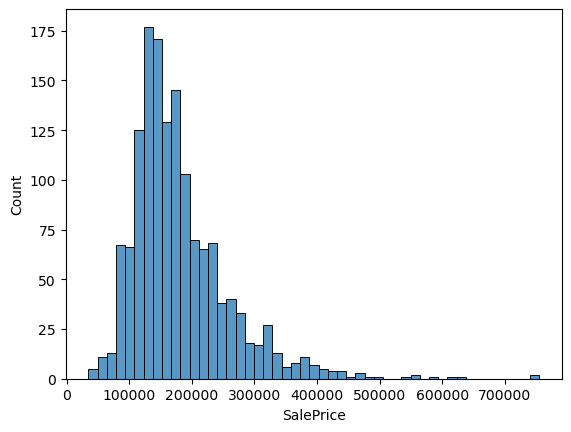

In [6]:
# SalePrice histogram
sns.histplot(data=dataset, x='SalePrice')

In [12]:
# ploting graphs
fig, ax = plt.subplots(len(num_features), 1, figsize=(8, len(num_features)*8))
for d in range(len(num_features)):
    sns.histplot(data=dataset, x=num_features[d], ax=ax[d])

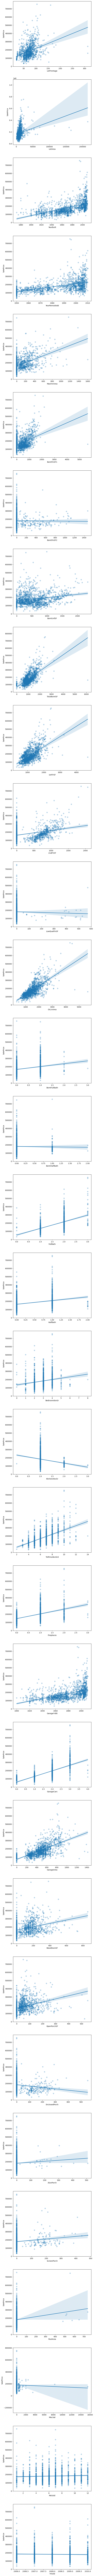

In [18]:
fig, ax = plt.subplots(len(num_features)-1, 1, figsize=(8, (len(num_features)-1)*8))
for d in range(len(num_features)-1):
    sns.regplot(data=dataset, y='SalePrice', x=num_features[d], ax=ax[d], scatter_kws={'alpha':0.3})

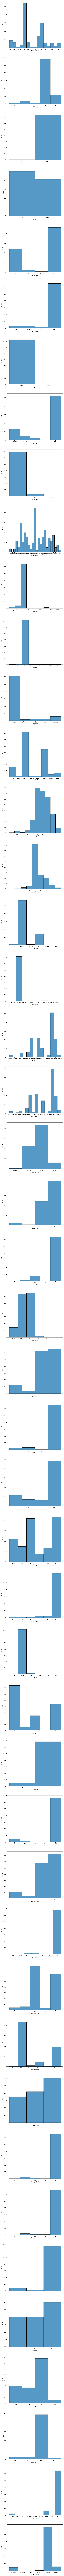

In [15]:
fig, ax = plt.subplots(len(cat_features), 1, figsize=(8, len(cat_features)*8))
for d in range(len(cat_features)):
    sns.histplot(data=dataset, x=cat_features[d], ax=ax[d])

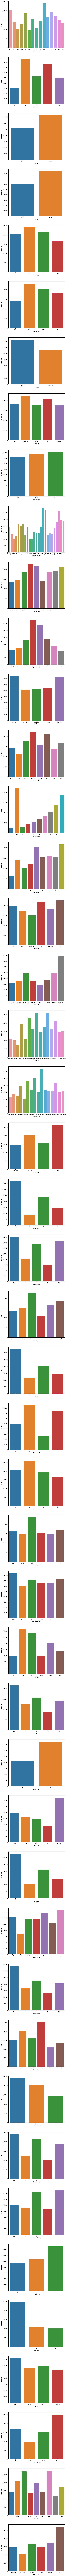

In [19]:
fig, ax = plt.subplots(len(cat_features), 1, figsize=(8, len(cat_features)*8))
for d in range(len(cat_features)):
    sns.barplot(data=dataset, y='SalePrice', x=cat_features[d], ax=ax[d], errorbar=None)